# COMP20008 Assignment 2
Report link:

https://docs.google.com/document/d/1wv4iSgtWfEiXG3n4PdurPnGczOYAxn9xPcMxS3q4tQE/edit?usp=sharing





Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import sys

data = pd.read_csv("titles.csv")
data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


## 1 Preprocessing Stage

### 1.1 One-hot encode genres and countries


In [2]:
# List of genres and countries to add
genres = set()
countries = set()

# Retrieve list of genres and countries
for index, row in data.iterrows():
    for genre in list(ast.literal_eval(row["genres"])):
        genres.add(genre)
    for country in ast.literal_eval(row["production_countries"]):
        countries.add(country)

# Sort lists
genres = sorted(list(genres))
countries = sorted(list(countries))

# Add new indicator columns to data
for genre in genres:
    data["genre_" + genre] = data["genres"].apply(              # this adds the genre column
        lambda x: 1 if genre in ast.literal_eval(x) else 0      # sets to 0 or 1 depending on genre
    )
for country in countries:
    data["country_" + str(country)] = data["production_countries"].apply(     
        lambda x: 1 if country in ast.literal_eval(x) else 0      
    )
data

/tmp/ipykernel_29/3024175212.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["country_" + str(country)] = data["production_countries"].apply(
/tmp/ipykernel_29/3024175212.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["country_" + str(country)] = data["production_countries"].apply(
/tmp/ipykernel_29/3024175212.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,country_TZ,country_UA,country_US,country_UY,country_VA,country_VE,country_VN,country_XX,country_ZA,country_ZW
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,...,0,0,1,0,0,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,...,0,0,1,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,...,0,0,1,0,0,0,0,0,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,...,0,0,0,0,0,0,0,0,0,0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,...,0,0,0,0,0,0,0,0,0,0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,...,0,0,0,0,0,0,0,0,0,0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,...,0,0,1,0,0,0,0,0,0,0


### 1.2 Data Cleaning
Remove unnecessary columsn and rows with empty votes/scores

In [3]:
data = data.drop(columns=["seasons"])
data = data.drop(columns=["genres"])
data = data.drop(columns=["id"])                   
data = data.drop(columns=["imdb_id"])
data = data.drop(columns=["age_certification"]) 
data = data.dropna(subset=['imdb_score', 'imdb_votes'])  #for linear regression

print(data.head(10))

                              title   type  \
1                       Taxi Driver  MOVIE   
2                       Deliverance  MOVIE   
3   Monty Python and the Holy Grail  MOVIE   
4                   The Dirty Dozen  MOVIE   
5      Monty Python's Flying Circus   SHOW   
6                     Life of Brian  MOVIE   
7                       Dirty Harry  MOVIE   
8                  Bonnie and Clyde  MOVIE   
9                   The Blue Lagoon  MOVIE   
10             The Guns of Navarone  MOVIE   

                                          description  release_year  runtime  \
1   A mentally unstable Vietnam War veteran works ...          1976      114   
2   Intent on seeing the Cahulawassee River before...          1972      109   
3   King Arthur, accompanied by his squire, recrui...          1975       91   
4   12 American military prisoners in World War II...          1967      150   
5   A British sketch comedy series with the shows ...          1969       30   
6   Brian Coh

## 2 Machine Learning

### 2.1 Preliminary visualisations
Investigate frequency distribution of scores, popularity, and votes.

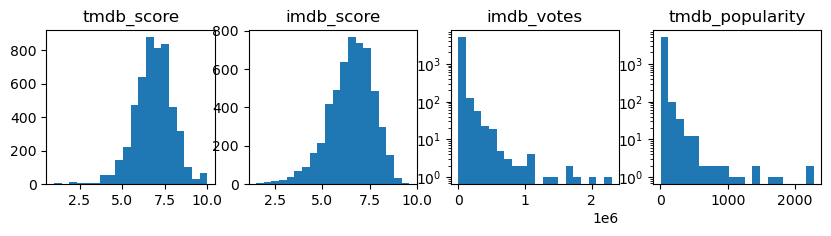

In [4]:
plot_columns = ["tmdb_score", "imdb_score", "imdb_votes", "tmdb_popularity"]
plt.figure(figsize=(10, 2))
for i, column in enumerate(plot_columns):
    plt.subplot(1, len(plot_columns), i+1)
    plt.title(column)
    if i in [2,3]:
        plt.yscale('log')
    plt.hist(data[column], bins=20)
plt.show()

IMDb votes on a log scale due to original data being highly right skewed

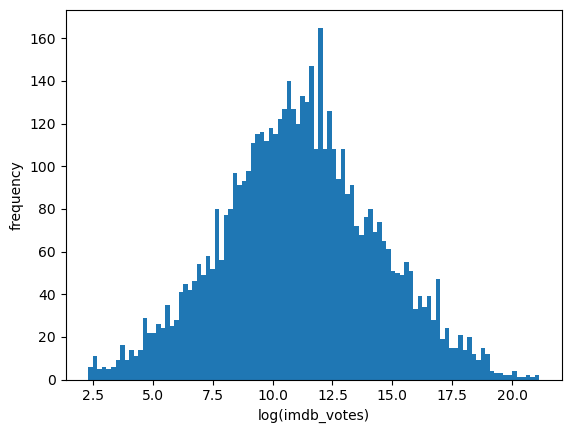

In [5]:
plt.hist(data['imdb_votes'].apply(np.log2), bins=100)
plt.xlabel('log(imdb_votes)')
plt.ylabel('frequency')
plt.show()

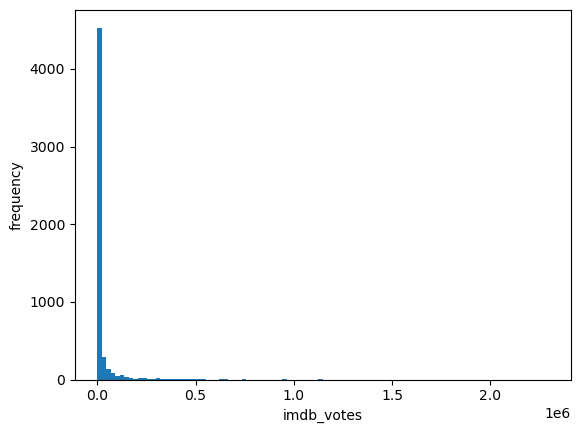

In [6]:
plt.hist(data['imdb_votes'], bins=100)
plt.xlabel('imdb_votes')
plt.ylabel('frequency')
plt.show()

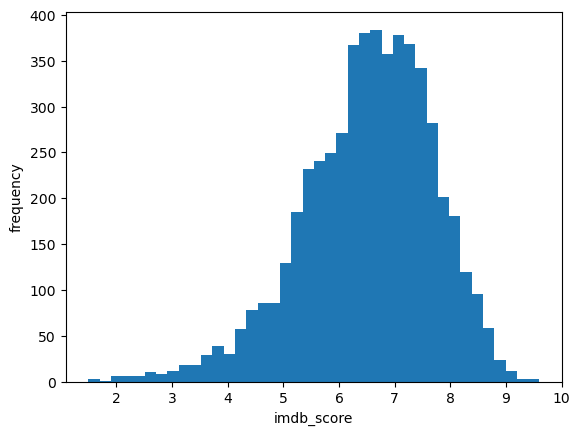

In [7]:
plt.hist(data['imdb_score'], bins=40)
plt.xlabel('imdb_score')
plt.ylabel('frequency')
plt.show()

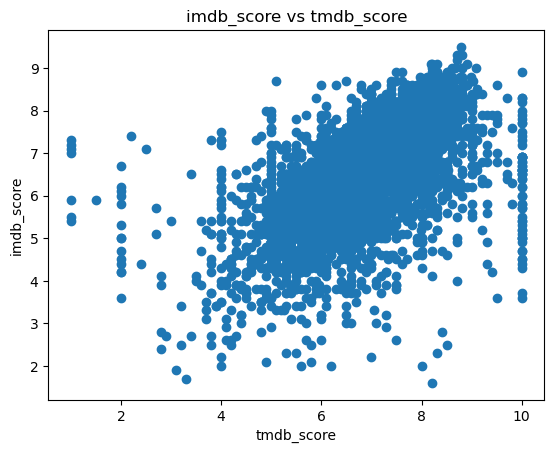

In [8]:
plt.scatter(data[plot_columns[0]],data[plot_columns[1]])
plt.xlabel(plot_columns[0])
plt.ylabel(plot_columns[1])
plt.title(plot_columns[1] + " vs " + plot_columns[0])
plt.show()

### 2.2 Regression

In [9]:
data.dropna(subset=['imdb_score', 'imdb_votes'], inplace=True)

data['normalized_votes'] = (data['imdb_votes'] - data['imdb_votes'].min()) / (data['imdb_votes'].max() - data['imdb_votes'].min())
data['normalized_score'] = data['imdb_score'] / 10.0  # Since scores are already between 0-10

# 2. Compute weighted sum and scale it to be out of 10
# Assuming 70% weight for voters and 30% for score
data['popularity'] = (0.7 * data['normalized_votes'] + 0.3 * data['normalized_score']) * 10

# 143 features, 5850 entries, 109 countries, 19 genres = 128 one hot encoded features
X = pd.concat([data.iloc[:, -131:-4], data[['release_year', 'runtime']]], axis=1)
y = data.iloc[:, -1]

In [10]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
significant_level = 0.05
results = pd.DataFrame({    
    'feature': X.columns[1:], 
    'coeff': model.params[1:], 
    'p-value': model.pvalues[1:]
})
results['significant'] = results['p-value'] < significant_level
results = results[results['significant'] == True].sort_values(by='p-value')
results.to_csv('results.csv')

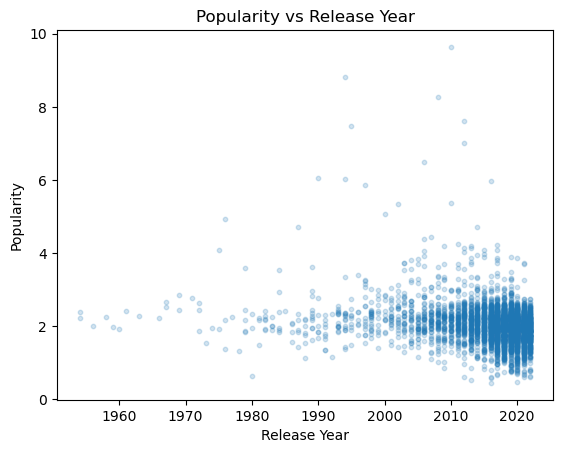

In [11]:
plt.scatter(data['release_year'], data['popularity'], s=10, alpha=0.2)
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Popularity vs Release Year')
plt.show()

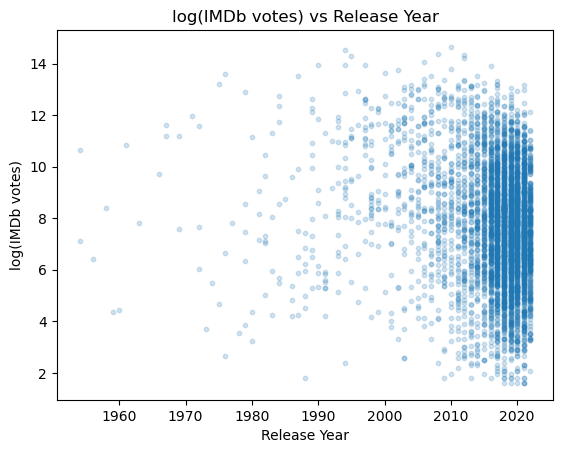

In [12]:
plt.scatter(data['release_year'], data['imdb_votes'].apply(np.log), s=10, alpha=0.2)
plt.xlabel('Release Year')
plt.ylabel('log(IMDb votes)')
plt.title('log(IMDb votes) vs Release Year')
plt.show()

In [13]:
# Backward elimination
eliminated_list = []
while True:
    model = sm.OLS(y, X).fit()
    results = pd.DataFrame({
        'feature': X.columns[1:], 
        'coeff': model.params[1:], 
        'p-value': model.pvalues[1:]
    })
    results['significant'] = results['p-value'] < significant_level
    if (results['significant'] == False).sum() == 0:
        break
    elimination_feature = results[results['significant'] == False].sort_values(by='p-value', ascending=False).head(1)['feature']
    eliminated_list.append(elimination_feature.to_string(index=False))
    X = X.drop(elimination_feature, axis=1)
    print(X.shape)
print(results.sort_values(by='p-value'))
print("Order of eliminated variables")
for item in eliminated_list:
    print(item)
    

(5352, 129)
(5352, 128)
(5352, 127)
(5352, 126)
(5352, 125)
(5352, 124)
(5352, 123)
(5352, 122)
(5352, 121)
(5352, 120)
(5352, 119)
(5352, 118)
(5352, 117)
(5352, 116)
(5352, 115)
(5352, 114)
(5352, 113)
(5352, 112)
(5352, 111)
(5352, 110)
(5352, 109)
(5352, 108)
(5352, 107)
(5352, 106)
(5352, 105)
(5352, 104)
(5352, 103)
(5352, 102)
(5352, 101)
(5352, 100)
(5352, 99)
(5352, 98)
(5352, 97)
(5352, 96)
(5352, 95)
(5352, 94)
(5352, 93)
(5352, 92)
(5352, 91)
(5352, 90)
(5352, 89)
(5352, 88)
(5352, 87)
(5352, 86)
(5352, 85)
(5352, 84)
(5352, 83)
(5352, 82)
(5352, 81)
(5352, 80)
(5352, 79)
(5352, 78)
(5352, 77)
(5352, 76)
(5352, 75)
(5352, 74)
(5352, 73)
(5352, 72)
(5352, 71)
(5352, 70)
(5352, 69)
(5352, 68)
(5352, 67)
(5352, 66)
(5352, 65)
(5352, 64)
(5352, 63)
(5352, 62)
(5352, 61)
(5352, 60)
(5352, 59)
(5352, 58)
(5352, 57)
(5352, 56)
(5352, 55)
(5352, 54)
(5352, 53)
(5352, 52)
(5352, 51)
(5352, 50)
(5352, 49)
(5352, 48)
(5352, 47)
(5352, 46)
(5352, 45)
(5352, 44)
(5352, 43)
(5352, 42)
(5

### 2.3 Determining popularity

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data = pd.read_csv("titles.csv")
data.dropna(subset=['imdb_score', 'imdb_votes'], inplace=True)

# Extract the 'IMDB_Score' and 'IMDB_Votes' columns
imdb_score = data['imdb_score']
imdb_votes = data['imdb_votes']

data['log_votes'] = np.log((data['imdb_votes']))
data['normalized_votes'] = (data['log_votes'] - data['log_votes'].min()) / (data['log_votes'].max() - data['log_votes'].min())
data['normalized_score'] = data['imdb_score'] / 10.0  # Since scores are already between 0-10



# 2. Compute weighted sum and scale it to be out of 10
# Assuming 70% weight for voters and 30% for score
data['popularity'] = (0.7 * data['normalized_votes'] + 0.3 * data['normalized_score']) * 10

# Define the bins and labels
bins = [0, 5, 7, 10]
labels = ['bad', 'average', 'good']

# Create a new column 'popularity_label' with the respective labels
data['popularity_label'] = pd.cut(data['popularity'], bins=bins, labels=labels, right=False)

print(data[['popularity', 'popularity_label']])
count_bad = (data['popularity_label'] == 'bad').sum()
print(f"Number of rows labeled as 'bad': {count_bad}")

count_average = (data['popularity_label'] == 'average').sum()
print(f"Number of rows labeled as 'average': {count_average}")

count_good = (data['popularity_label'] == 'good').sum()
print(f"Number of rows labeled as 'good': {count_good}")


      popularity popularity_label
1       8.900025             good
2       7.667425             good
3       8.677738             good
4       7.456251             good
5       7.791853             good
...          ...              ...
5843    3.744753              bad
5845    3.219811              bad
5846    4.588174              bad
5847    2.541490              bad
5849    3.027804              bad

[5352 rows x 2 columns]
Number of rows labeled as 'bad': 2287
Number of rows labeled as 'average': 2553
Number of rows labeled as 'good': 512


### 2.4 Genre to determine popularity

In [15]:
# machine learning for genres to determine popularity
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


for genre in genres:
    data["genre_" + genre] = data["genres"].apply(              # this adds the genre column
        lambda x: 1 if genre in ast.literal_eval(x) else 0      # sets to 0 or 1 depending on genre
    )


X = data.drop(columns=['popularity', 'title', 'type', 'imdb_id', 'imdb_score', 'imdb_votes',
                       'description', 'runtime', 'release_year', 'production_countries',
                       'tmdb_popularity', 'tmdb_score', 'id', 'age_certification', 'seasons'
                       , 'normalized_score', 'normalized_votes', 'genres', 'popularity_label', 
                       'log_votes'])


# Target variable is the derived popularity metric
y = data['popularity_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


clf = DecisionTreeClassifier(criterion= "entropy", max_depth=8)  # Setting a max_depth to prevent overfitting
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

print("Predicted labels", y_pred[:5])

accuracy score:  0.5564892623716153
              precision    recall  f1-score   support

     average       0.56      0.53      0.55       507
         bad       0.56      0.68      0.62       476
        good       0.15      0.02      0.04        88

    accuracy                           0.56      1071
   macro avg       0.43      0.41      0.40      1071
weighted avg       0.53      0.56      0.54      1071

Predicted labels ['average' 'average' 'bad' 'bad' 'average']


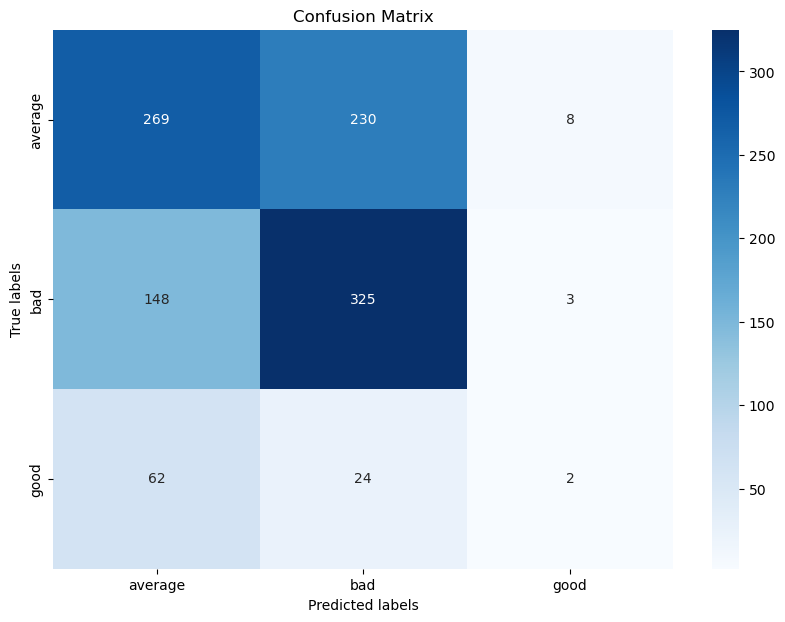

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


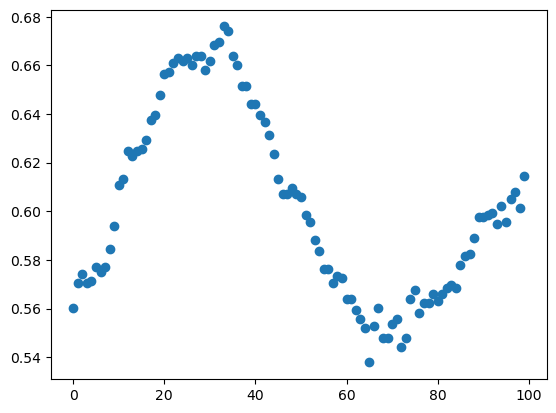

0.46673281299927566
0.24013634982025764


In [17]:
accuracy_list = []
for i in range(100):
    data['popularity'] = (i/100 * data['normalized_votes'] + (100-i)/100 * data['normalized_score']) * 10
    data['popularity_label'] = pd.cut(data['popularity'], bins=bins, labels=labels, right=False)
    count_bad = (data['popularity_label'] == 'bad').sum()
    count_average = (data['popularity_label'] == 'average').sum()
    count_good = (data['popularity_label'] == 'good').sum()
    y = data['popularity_label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(max_depth=5)  # Setting a max_depth to prevent overfitting
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
plt.scatter(range(100), accuracy_list)
plt.show()
print(np.corrcoef(data['popularity'], data['imdb_votes'])[0, 1])
print(np.corrcoef(data['popularity'], data['imdb_score'])[0, 1])


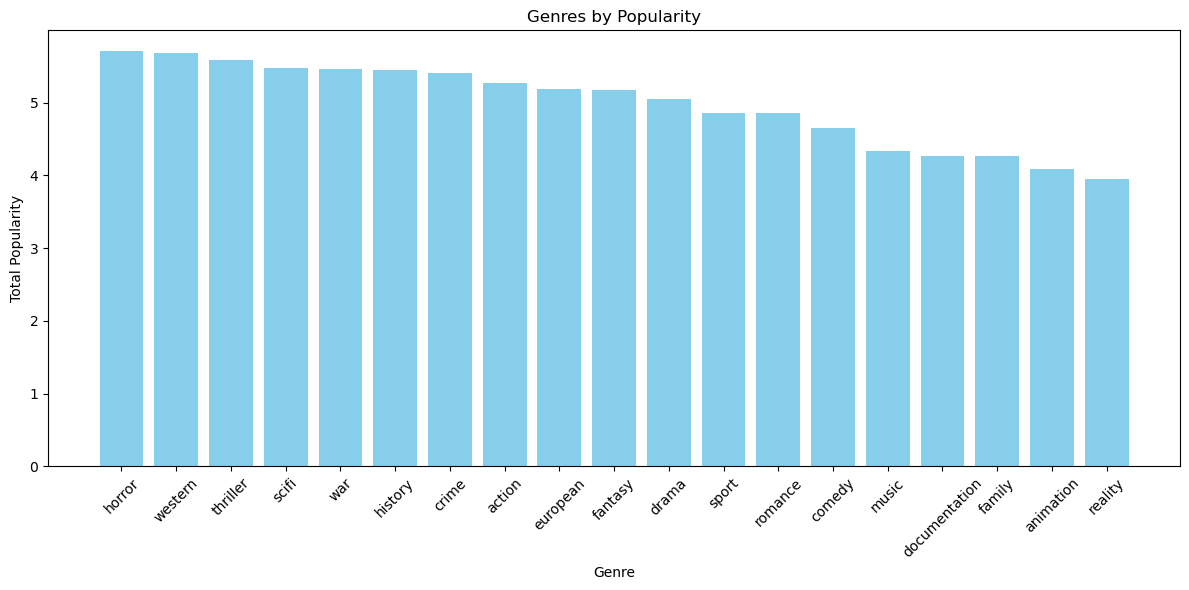

In [18]:
# bar chart for the most popular genre.
genre_popularity = {}

#getting a genre list
genre_columns = [col for col in data.columns if col.startswith("genre_")]
genres = [col.split("_")[1] for col in genre_columns]


#find mean popularity of each genre
for genre in genres:
    genre_column = "genre_" + genre
    genre_popularity[genre] = data[data[genre_column] == 1]['popularity'].mean()

# Convert the dictionary to a DataFrame and sort
genre_df = pd.DataFrame(list(genre_popularity.items()), columns=['Genre', 'Total Popularity'])
sorted_genres = genre_df.sort_values(by='Total Popularity', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_genres['Genre'], sorted_genres['Total Popularity'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total Popularity')
plt.title('Genres by Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [19]:
#GENRES ON THE BINNED POPULARITY labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Extract genre columns
genre_columns = [col for col in data.columns if col.startswith("genre_")]

genre_mode_labels = {}
for genre_col in genre_columns:
    mode_label = data[data[genre_col] == 1]['popularity_label'].mode().iloc[0]
    genre_mode_labels[genre_col] = mode_label

good_genres = {genre: label for genre, label in genre_mode_labels.items() if label == 'good'}
average_genres = {genre: label for genre, label in genre_mode_labels.items() if label == 'average'}
bad_genres = {genre: label for genre, label in genre_mode_labels.items() if label == 'bad'}

print("good genres: ", good_genres)
print("average genres: ",average_genres)
print("bad genres: ",bad_genres)







good genres:  {}
average genres:  {'genre_crime': 'average', 'genre_history': 'average', 'genre_horror': 'average', 'genre_scifi': 'average', 'genre_thriller': 'average', 'genre_war': 'average', 'genre_western': 'average'}
bad genres:  {'genre_action': 'bad', 'genre_animation': 'bad', 'genre_comedy': 'bad', 'genre_documentation': 'bad', 'genre_drama': 'bad', 'genre_european': 'bad', 'genre_family': 'bad', 'genre_fantasy': 'bad', 'genre_music': 'bad', 'genre_reality': 'bad', 'genre_romance': 'bad', 'genre_sport': 'bad'}


In [20]:
#mutual information

import numpy as np
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Assuming you've loaded your data into a DataFrame called 'data'
# and genres are one-hot encoded with a prefix "genre_"

# Extract one-hot encoded genre columns
genre_columns = [col for col in data.columns if col.startswith("genre_")]

X = data[genre_columns]
Y = data['popularity_label']  
# Assuming popularity_label contains categories like "good", "average", "bad"

mi = mutual_info_classif(X, Y, discrete_features=True)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({
    'Genre': genre_columns,
    'Mutual Information': mi
})

# Sort genres by mutual information and display
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)


                  Genre  Mutual Information
16       genre_thriller            0.033385
5           genre_drama            0.021346
3           genre_crime            0.015961
0          genre_action            0.014165
10         genre_horror            0.013332
4   genre_documentation            0.012761
14          genre_scifi            0.009845
12        genre_reality            0.007488
8         genre_fantasy            0.004376
1       genre_animation            0.004041
9         genre_history            0.003995
7          genre_family            0.003694
17            genre_war            0.002750
6        genre_european            0.002249
11          genre_music            0.001888
13        genre_romance            0.001658
18        genre_western            0.001512
2          genre_comedy            0.000821
15          genre_sport            0.000046


In [21]:
#determining importance of each genre
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
importances = clf.feature_importances_

genre_importances = {genre: importances[idx] for idx, genre in enumerate(genres)}
sorted_genres = sorted(genre_importances.items(), key=lambda x: x[1], reverse=True)

print(sorted_genres)

[('drama', 0.08799973128358281), ('thriller', 0.08687095067005131), ('crime', 0.0760382193687126), ('comedy', 0.07081253780457519), ('action', 0.07065117362525912), ('romance', 0.06596405085586367), ('scifi', 0.06125446222073594), ('fantasy', 0.06061254074917414), ('european', 0.0568236929209411), ('horror', 0.05273207329165629), ('animation', 0.051809042436511694), ('family', 0.048724392873657034), ('history', 0.043607780302225674), ('war', 0.03450750225324002), ('documentation', 0.033235618579711294), ('music', 0.0317820572587098), ('sport', 0.02940322493804479), ('reality', 0.01955258153927066), ('western', 0.01761836702807697)]
